In [1]:
import nltk 

## 1. Data Preparation

### Download the Dataset

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/zihanwang/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

### Access the Dataset

In [3]:
from nltk.corpus import movie_reviews

# Access the movie reviews and labels 
documents = [(list(movie_reviews.words(fileid)), category) 
             for category in movie_reviews.categories() 
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to ensure a balanced distribution of positive and negative reviews 
import random 
random.seed(123)
random.shuffle(documents)
print(len(documents))

2000


### Explore the Dataset

In [4]:
# Print the first review and its label 
print("Sample Review:", documents[0][0][:10]) 
print("Label:", documents[0][1])

Sample Review: ['most', 'movies', 'seem', 'to', 'release', 'a', 'third', 'movie', 'just', 'so']
Label: pos


### Preprocess

In [5]:
# lemmatization
from nltk.stem import WordNetLemmatizer as WL
wl = WL()

# stop words
from nltk.corpus import stopwords
en_stop_words=set(stopwords.words('english'))
for p in [',', '.', '"', '"', '-', ')', '(', "'", "?", "!", ":"]:
    en_stop_words.add(p)

# tokenizer
tokenizer = nltk.WordPunctTokenizer()

In [6]:
labels = ['pos', 'neg']
def pre_process(text):
    """
    cut words
    """
    # lower 
    text=text.lower()
    # tokenizer
    tokens= tokenizer.tokenize(text)
    # filter stop word
    tokens=[token for token in tokens if token not in en_stop_words]
    # lemmatize
    tokens=[wl.lemmatize(token) for token in tokens]
    return tokens

# preprocess data
for i, d in enumerate(documents):
    text = " ".join(d[0])
    words = pre_process(text)
    documents[i] = tuple([d[0], d[1], words, labels.index(d[1])])
    

In [12]:
# Print the first review and its label 
print("Sample Review:", documents[0][0][:20]) 
print("words:", documents[0][2][:10]) 
print("Label:", documents[0][1])

Sample Review: ['most', 'movies', 'seem', 'to', 'release', 'a', 'third', 'movie', 'just', 'so', 'it', 'can', 'be', 'called', 'a', 'trilogy', '.', 'rocky', 'iii', 'seems']
words: ['movie', 'seem', 'release', 'third', 'movie', 'called', 'trilogy', 'rocky', 'iii', 'seems']
Label: pos


## 2. Coverage Analysis Insights 

### word frequency count

In [11]:
def word_count(documents):
    word2num = {}
    for d in documents:
        for w in d[2]:
            if w not in word2num:
                word2num[w] = 0.0
            word2num[w] += 1
    return word2num
word2num = word_count(documents)
words = [i[0] for i in sorted(word2num.items(), key=lambda x: -x[1])] # 单词频率从大到小排序

word_total_num = sum(word2num.values())
print("number of unique words  " + str(len(words)))
print("number of total words " + str(int(word_total_num)))

number of unique words  35193
number of total words 716254


In [21]:
coverage = []
n = 0.0
for w in words:
    n = n + word2num[w]
    coverage.append([w, n / word_total_num])

In [22]:
coverage[0:10]

[['film', 0.015431676472312894],
 ['movie', 0.02517263428895336],
 ['one', 0.03358864313497726],
 ['character', 0.039004319696643926],
 ['like', 0.04429434250978005],
 ['time', 0.04845348158614123],
 ['get', 0.05238225545686307],
 ['scene', 0.05611137948269748],
 ['make', 0.05978884585635822],
 ['even', 0.06337416614776323]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


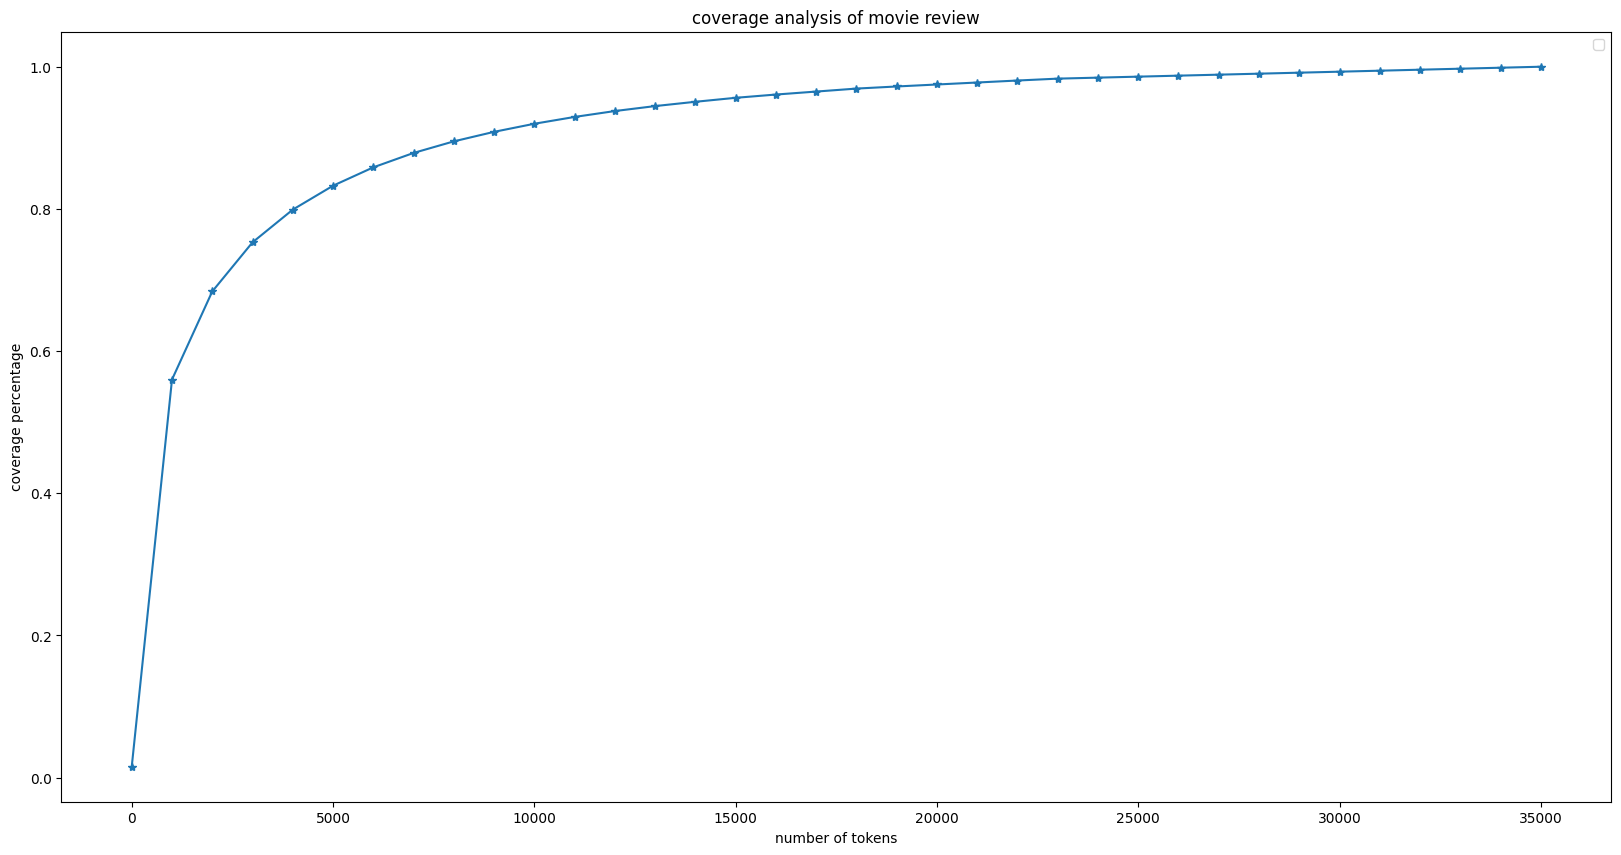

In [28]:
import matplotlib.pyplot as plt
def plot(coverage,  title, x_label, y_label):
    x = [i for i in range(0, len(coverage), 1000)]
    y = [coverage[i][1] for i in x]
    plt.figure(figsize=(20, 10), dpi=100)
    plt.plot(x, y, marker='*')
   
    plt.legend() 
    plt.title(title)
    plt.xlabel(x_label)  
    plt.ylabel(y_label) 
    plt.show()

plot(coverage, 'coverage analysis of movie review', 'number of tokens', 'coverage percentage')

Discuss the insights gained from the coverage analysis. Consider questions such as:

1. How does the coverage change with the number of tokens considered?

- As the number of tokens increases, the coverage will increase.\
- The first 10,000 words cover about 90% of the vocabulary. After 10,000, the coverage rate slowly increases.\
- For words between 30,000 and 35,000, the coverage rate increases very slowly.
- The steep rise at the beginning of the curve indicates that a small fraction of unique markers constitute a significant portion of the data set. This is consistent with Zipf's law in linguistics, which states that a few words are used very frequently, while the frequency of less common words drops sharply.

2. At what point does the coverage seem to stabilize?

- After 20,000 words, the coverage rate stabilizes.

3. Are there diminishing returns in terms of coverage as the number of tokens increases?

- There are diminishing returns. As we move along the x-axis, which represents the number of tokens, the curve starts to flatten. This suggests that adding more unique tokens does not significantly increase coverage. Most of these tags are probably rare words that don't appear often in reviews.

### Rationalization for Vocabulary Choice

Discuss the rationale for choosing a specific vocabulary size for modeling. Consider factors such as:

1. The trade-off between a larger vocabulary (more words) and computational efficiency.

- A large vocabulary enables the model to capture language expressions comprehensively and meticulously, making the input to the model richer and more comprehensive. However, when the vocabulary increases, it will increase the computational complexity of training and inference.
- A small vocabulary can reduce model inference delay, but a small vocabulary reduces model input features and makes it prone to underfitting.

2. The impact of rare or very common words on the model's generalization.

- Rare words may lead to overfitting, where the model performs well on training data but generalizes poorly on new, unseen data.
- Common words usually have no actual meaning and do not significantly help the model, and can be treated as stop words or filtered out to focus more on information-rich features.

3. The need to balance informativeness and model complexity.

- Information content: A larger vocabulary can capture more diverse language patterns, potentially enhancing the model's ability to understand and generate text. However, it is crucial to ensure that the added complexity of a larger vocabulary makes a substantial contribution to performance.
- Model complexity: Simplifying the vocabulary may lead to more interpretable and efficient models. Finding the right balance is critical to preventing unnecessary complexity without compromising mission performance.

4. Any specific considerations for the chosen algorithms (Naive Bayes, Logistic Regression, MLP) in terms of vocabulary size

- Naive Bayes: Naive Bayes models generally work well with relatively simple, compact vocabularies. The independence assumption in Naive Bayes makes it perform well on smaller vocabulary sizes.

## 3. Algorithm Implementation

### split train and test

In [29]:
ratio = 0.8
train_data = []
test_data = []
for d in documents:
    if random.random() < ratio:
        train_data.append(d)
    else:
        test_data.append(d)
print(f"train data size {len(train_data)}, test data size {len(test_data)}")

train data size 1602, test data size 398


### tf 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

tf_transformer = CountVectorizer()


train_corpus =[' '.join(i[2]) for i in train_data]
train_y = np.array([i[3] for i in train_data])

test_corpus = [' '.join(i[2]) for i in test_data]
test_y = np.array([i[3] for i in test_data])

train_tf_X = tf_transformer.fit_transform(train_corpus)
print(f"train tf representation shape {train_tf_X.toarray().shape}")

test_tf_X = tf_transformer.transform(test_corpus)
print(f"test tf representation shape {test_tf_X.toarray().shape}")



train tf representation shape (1602, 32232)
test tf representation shape (398, 32232)


### tfidf

In [31]:

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

tf_idf_transformer = TfidfTransformer()


train_tfidf_X = tf_idf_transformer.fit_transform( vectorizer.fit_transform(train_corpus) )
print(f"train tfidf representation shape {train_tfidf_X.toarray().shape}")

test_tfidf_X = tf_idf_transformer.transform( vectorizer.transform(test_corpus) )
print(f"test tfidf representation shape {test_tfidf_X.toarray().shape}")


train tfidf representation shape (1602, 32232)
test tfidf representation shape (398, 32232)


### Naive Bayes 

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb_tf = GaussianNB()
gnb_tf.fit(train_tf_X.toarray(), train_y)
gnb_tf_pred = gnb_tf.predict(test_tf_X.toarray())



gnb_tfidf = GaussianNB()
gnb_tfidf.fit(train_tfidf_X.toarray(), train_y)
gnb_tfidf_pred = gnb_tfidf.predict(test_tfidf_X.toarray())


### Logistic Regression

In [33]:

from sklearn.linear_model import LogisticRegression

# init model
lr_tf = LogisticRegression()


lr_tf.fit(train_tf_X.toarray(), train_y)
lr_tf_pred = lr_tf.predict(test_tf_X.toarray())


lr_tfidf = LogisticRegression()
lr_tfidf.fit(train_tfidf_X.toarray(), train_y)
lr_tfidf_pred = lr_tfidf.predict(test_tfidf_X.toarray())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Multilayer Perceptron

In [37]:
## layers is 2 
## neurons of layer 1 is 50
## neurons of layer 1 is 100

from sklearn.neural_network import MLPClassifier


mlp_tf = MLPClassifier(solver = 'sgd', activation = 'logistic', max_iter = 100, 
                       hidden_layer_sizes = (50,100,),random_state = 1)

mlp_tf.fit(train_tf_X.toarray(), train_y)
mlp_tf_pred = mlp_tf.predict(test_tf_X.toarray())


mlp_tfidf = MLPClassifier(solver = 'sgd', activation = 'logistic', max_iter = 100, 
                       hidden_layer_sizes = (50,100,),random_state = 1)
mlp_tfidf.fit(train_tfidf_X.toarray(), train_y)
mlp_tfidf_pred = mlp_tfidf.predict(test_tfidf_X.toarray())


## 4. Training and Evaluation

In [34]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


def metrics(true,pred, model_name, input_type,labels):
    # accuracy
    acc = accuracy_score(true, pred)
    acc = round(acc, 2)
    
    # precision
    p = precision_score(true, pred, average=None)
    p = [round(i,2) for i in p]
    # recall
    r = recall_score(true, pred, average=None)
    r = [round(i,2) for i in r]
    # f1-score
    f1 = f1_score(true, pred, average=None)
    f1 = [round(i,2) for i in f1]
    print(f"{model_name}, {input_type}, accuracy {acc}")
    print(f"pos precison {p[0]}, pos recall {r[0]}, pos f1 {f1[0]}")
    print(f"neg precison {p[1]}, neg recall {r[1]}, neg f1 {f1[1]}")
    print(f"tpr {r[0]}, fpr {round(1 - r[1],2)}")
    print("-" * 50)
    return acc, p, r, f1

In [38]:
# from sklearn.metrics import classification_report
# def evaluation(y_true, y_pred, model_name, representation, target_names):
#     print("text representation: " + representation + ", model name: " + model_name )
#     print(classification_report(y_true, y_pred, target_names=target_names))
#     print("-" * 100)
    


# evaluation(test_y, gnb_tf_pred, "Naive Bayes", "tf",  labels)
# evaluation(test_y, gnb_tfidf_pred, "Naive Bayes", "tfidf", labels)

# evaluation(test_y, lr_tf_pred, "Logistic Regression", "tf", labels)
# evaluation(test_y, lr_tfidf_pred, "Logistic Regression", "tfidf", labels)

# evaluation(test_y, mlp_tf_pred, "Multilayer Perceptron", "tf", labels)
# evaluation(test_y, mlp_tfidf_pred, "Multilayer Perceptron", "tfidf", labels)


In [39]:
nb = "Naive Bayes"
lr = "Logistic Regression"
mlp = "Multilayer Perceptron"
tf = "tf"
tfidf = "tfidf"


gnb_tf_acc, gnb_tf_p, gnb_tf_r, gnb_tf_f1 = metrics(test_y, gnb_tf_pred,nb , tf,  labels)

gnb_tfidf_acc, gnb_tfidf_p, gnb_tfidf_r, gnb_tfidf_f1 =metrics(test_y, gnb_tfidf_pred, nb,tfidf, labels)

lr_tf_acc, lr_tf_p, lr_tf_r, lr_tf_f1 =metrics(test_y, lr_tf_pred, lr, tf, labels)
lr_tfidf_acc, lr_tfidf_p, lr_tfidf_r, lr_tfidf_f1  =metrics(test_y, lr_tfidf_pred, lr, tfidf ,labels)

mlp_tf_acc, mlp_tf_p, mlp_tf_r, mlp_tf_f1 =metrics(test_y, mlp_tf_pred, mlp, tf, labels)
mlp_tfidf_acc, mlp_tfidf_p, mlp_tfidf_r, mlp_tfidf_f1  =metrics(test_y, mlp_tfidf_pred, mlp, tfidf ,labels)


Naive Bayes, tf, accuracy 0.65
pos precison 0.63, pos recall 0.72, pos f1 0.67
neg precison 0.68, neg recall 0.58, neg f1 0.63
tpr 0.72, fpr 0.42
--------------------------------------------------
Naive Bayes, tfidf, accuracy 0.65
pos precison 0.62, pos recall 0.73, pos f1 0.67
neg precison 0.68, neg recall 0.57, neg f1 0.62
tpr 0.73, fpr 0.43
--------------------------------------------------
Logistic Regression, tf, accuracy 0.8
pos precison 0.8, pos recall 0.81, pos f1 0.8
neg precison 0.81, neg recall 0.8, neg f1 0.81
tpr 0.81, fpr 0.2
--------------------------------------------------
Logistic Regression, tfidf, accuracy 0.78
pos precison 0.76, pos recall 0.82, pos f1 0.79
neg precison 0.81, neg recall 0.75, neg f1 0.78
tpr 0.82, fpr 0.25
--------------------------------------------------
Multilayer Perceptron, tf, accuracy 0.49
pos precison 0.49, pos recall 1.0, pos f1 0.66
neg precison 0.0, neg recall 0.0, neg f1 0.0
tpr 1.0, fpr 1.0
---------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Compare the impact of using TF and TF-IDF on each algorithm's performance.

# For the Naive Bayes algorithm,
# On the tpr indicator, the text representation based on tfidf is 0.1 higher than the text representation based on tf.
# On the fpr indicator, the text representation based on tfidf is 0.1 higher than the text representation based on tf


# For the Logistic Regression algorithm, when using tf,
# On the tpr indicator, the text representation based on tfidf is 0.1 higher than the text representation based on tf.
# On the fpr indicator, the text representation based on tfidf is 0.05 higher than the text representation based on tf


# For the Multilayer Perceptron algorithm, when using tf,
# On the tpr indicator, the text representation based on tfidf is the same as the text representation based on tf, both are 1.0
# On the fpr indicator, the text representation based on tfidf is the same as the text representation based on tf, both are 1.0



## 5.Visualization and Analysis (2 marks)

### a. Visualize the performance metrics (e.g., accuracy) for each algorithm using appropriate plots (e.g., bar chart).

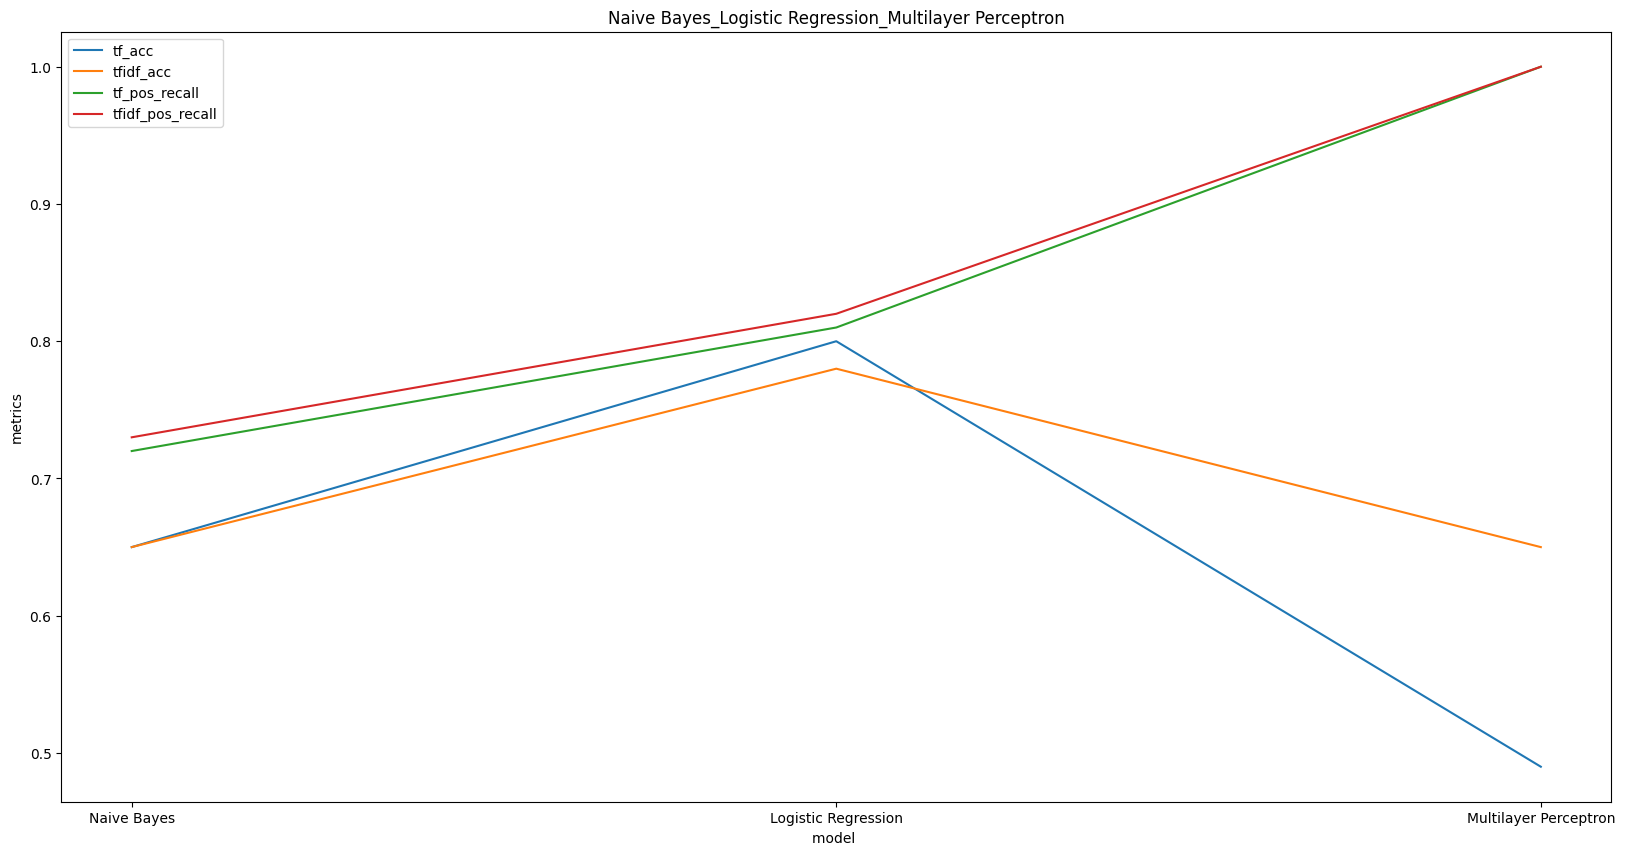

In [40]:
x = [nb, lr, mlp]

tf_acc = [gnb_tf_acc, lr_tf_acc, mlp_tf_acc]
tfidf_acc = [gnb_tfidf_acc, lr_tfidf_acc, gnb_tfidf_acc]




tf_recall_pos = [gnb_tf_r[0], lr_tf_r[0], mlp_tf_r[0]]
tfidf_recall_pos = [gnb_tfidf_r[0], lr_tfidf_r[0], mlp_tfidf_r[0]]




tf_precision_pos = [gnb_tf_p[0], lr_tf_p[0], mlp_tf_p[0]]
plt.figure(figsize=(20, 10), dpi=100)
plt.plot(x, tf_acc, label = 'tf_acc')
plt.plot(x, tfidf_acc, label='tfidf_acc')


plt.plot(x, tf_recall_pos, label = 'tf_pos_recall')
plt.plot(x, tfidf_recall_pos, label = 'tfidf_pos_recall')



plt.legend() 
plt.title(f"{nb}_{lr}_{mlp}")
plt.xlabel(f"model ")  
plt.ylabel("metrics")
plt.show()

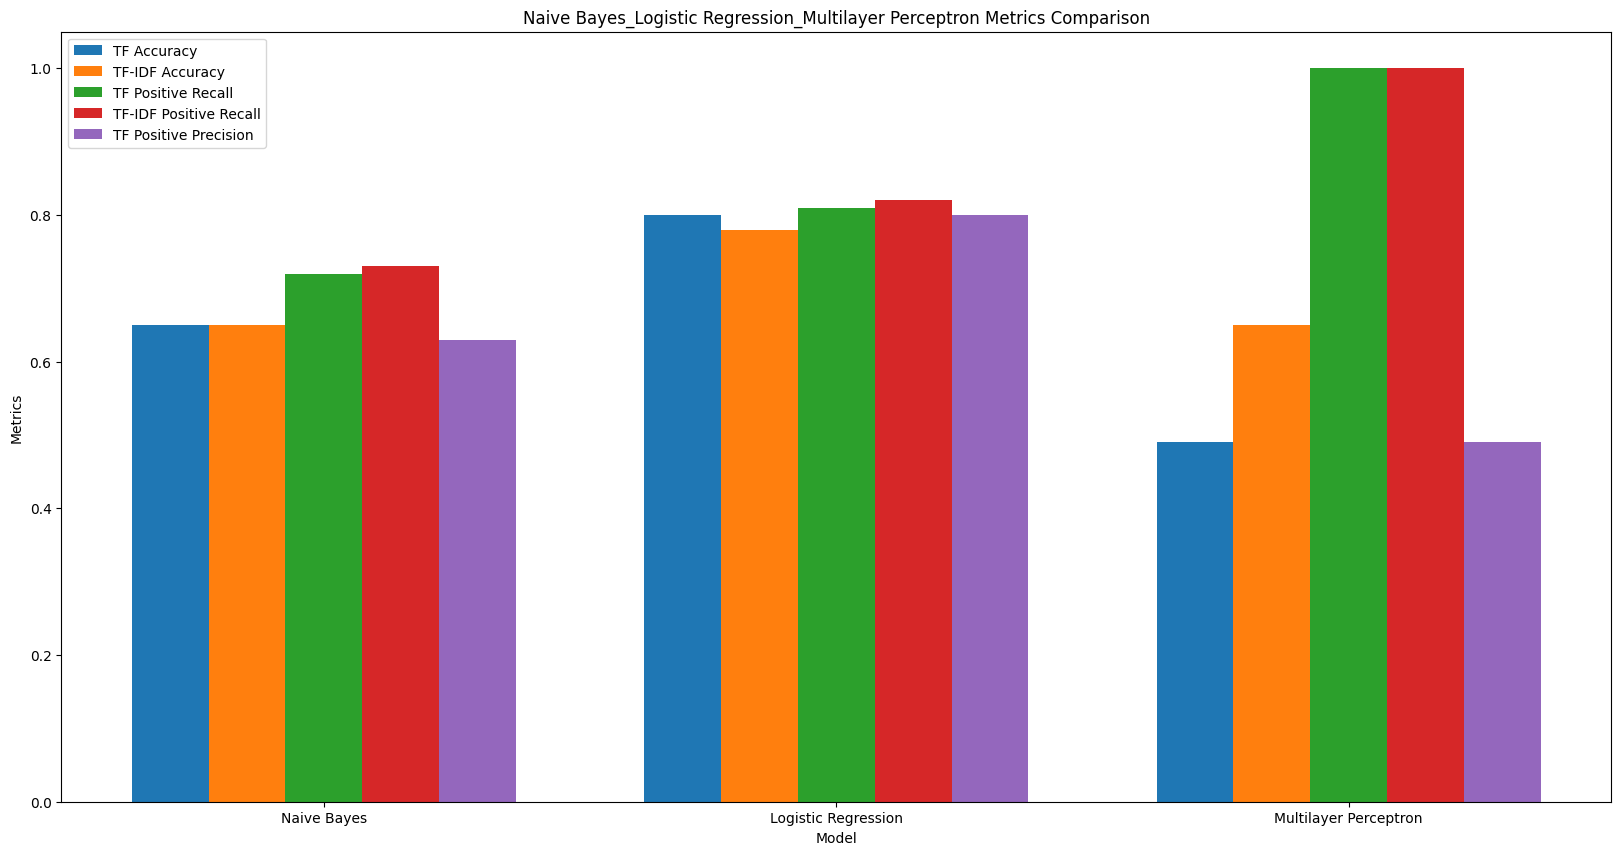

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming nb, lr, mlp are defined earlier in your code
x = [nb, lr, mlp]

# Your data
tf_acc = [gnb_tf_acc, lr_tf_acc, mlp_tf_acc]
tfidf_acc = [gnb_tfidf_acc, lr_tfidf_acc, gnb_tfidf_acc]

tf_recall_pos = [gnb_tf_r[0], lr_tf_r[0], mlp_tf_r[0]]
tfidf_recall_pos = [gnb_tfidf_r[0], lr_tfidf_r[0], mlp_tfidf_r[0]]

tf_precision_pos = [gnb_tf_p[0], lr_tf_p[0], mlp_tf_p[0]]

# Create figure and axis
plt.figure(figsize=(20, 10), dpi=100)
ax = plt.subplot(111)

# Calculate bar width
bar_width = 0.15
index = np.arange(len(x))

# Create bars for each metric
ax.bar(index, tf_acc, bar_width, label='TF Accuracy')
ax.bar(index + bar_width, tfidf_acc, bar_width, label='TF-IDF Accuracy')

ax.bar(index + 2*bar_width, tf_recall_pos, bar_width, label='TF Positive Recall')
ax.bar(index + 3*bar_width, tfidf_recall_pos, bar_width, label='TF-IDF Positive Recall')

ax.bar(index + 4*bar_width, tf_precision_pos, bar_width, label='TF Positive Precision')

# Set labels, title, legend
ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title(f'{nb}_{lr}_{mlp} Metrics Comparison')
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(x)
ax.legend()

# Show plot
plt.show()


### b. Discuss any observed trends or differences in performance.

In terms of accuracy, for Naive bayes and Logistic Regression models, the accuracy based on tf representation is higher than the accuracy based on idftf representation.
- For the Multilayer Perceptron model, the accuracy based on tf representation is lower than the accuracy based on idftf representation.

In terms of the recall rate of the pos class, for the Naive bayes, Logistic Regression, and Multilayer Perceptron models,
- The recall rate of POS based on tf representation is lower than the recall rate of POS based on idftf representation


## 6. Discussion

### a. Compare and analyze the results obtained by the three algorithms.

The Logistic Regression model has the highest index on f1 and tpr, and the lowest on fpr index. The model performs best.
And compared to Multilayer Perceptron, the logistic regression model is a layer of perceptron with lower computational complexity.



### b. Discuss the impact of using TF vs. TF-IDF on classification performance.

tf measures the frequency of terms in a document. It is a basic representation of the importance of a word in a document. It may not be taken into account that some words appear frequently in many documents and may not be discriminating.
tfidf addresses the limitations of tf by taking into account the uniqueness of words across the entire dataset. It assigns higher weights to words that are frequent in documents but rare in the entire corpus. This helps emphasize the discriminating power of the word.
In this movie_reviews data set, for the three models of Naive bayes, Logistic Regression, and Multilayer Perceptron, the text representation method of tfidf is better than the text representation method of tf.




### c. Provide insights into the strengths and limitations of each algorithm in the context of sentiment analysis.

Naive Bayes:
- Advantages: Simple, highly computationally efficient, and performs well on high-dimensional data.
- Limitations: Assuming features are independent, complex relationships may not be captured.

Logistic regression:
- Advantages: Interpretable, computationally efficient, and performs well when the decision boundary is approximately linear.
- Limitations: Limited performance when dealing with non-linear relationships.

Multilayer Perceptron (MLP):
- Advantages: Capable of capturing complex patterns and suitable for non-linear relationships.
- Limitations: Requires more data, is prone to overfitting, and has high computational requirements.

The choice of algorithm depends on the specific characteristics of the sentiment analysis task, including the complexity of the emotional expressions in the data, the amount of available data, and the computing resources at hand. It is critical to strike a balance between model complexity and mission requirements.